# Part II - (Ford GoBike Data Visualization)
## by (Meutem Gervis Dylan)


## Investigation Overview


> In this investigation, we are trying to understand our user behaviour in relation to our user demographics and user type, in other words we what to understand how our user age, gender affect their activities such as duration of trips and time. 
## Dataset Overview

> This dataset includes information on 174,955 individual trips made in the "Ford GoBike" bike sharing system covering the greater San Francisco Bay area. the data set also includes information about the duration of trips, the user type(subscribers or clients), the start and end date of the trip, the gender and age of the user and also the time and day of use of the service.
>Data entries with inconsistent or missing values are removed from the dataset


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174955 entries, 0 to 174954
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174955 non-null  int64  
 1   start_time               174955 non-null  object 
 2   end_time                 174955 non-null  object 
 3   start_station_id         174760 non-null  float64
 4   start_station_name       174760 non-null  object 
 5   end_station_id           174760 non-null  float64
 6   end_station_name         174760 non-null  object 
 7   user_type                174955 non-null  object 
 8   member_gender            174955 non-null  object 
 9   bike_share_for_all_trip  174955 non-null  object 
 10  member_age               174955 non-null  int64  
 11  weekday                  174955 non-null  object 
 12  time                     173382 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 17.4+ MB


## User Type distribution
>
>Plotting the user informations allow us to have an idea of GoBikes user demographic
>- Subscribers make up a greater proportion of the users that is 90% and costomers are a minority.
>- GoBike has more male users as compared to female users

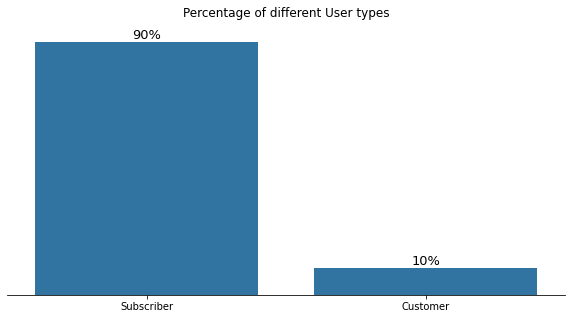

In [22]:
# adding percentages to each bar
fig, ax = plt.subplots(figsize = (10,5))
base_color = sb.color_palette()[0]

sb.countplot(x = "user_type", data = df, 
              order = df['user_type'].value_counts().index,
              color = base_color)

# Calculate % for each user types 
perc_list = []
type_sum = df['user_type'].value_counts().to_list()
total_sum = df.shape[0]
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
# Annotate bars
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1
plt.ylim([0, 170000])
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlabel("")
plt.title('Percentage of different User types')
sb.despine(fig, left = True);

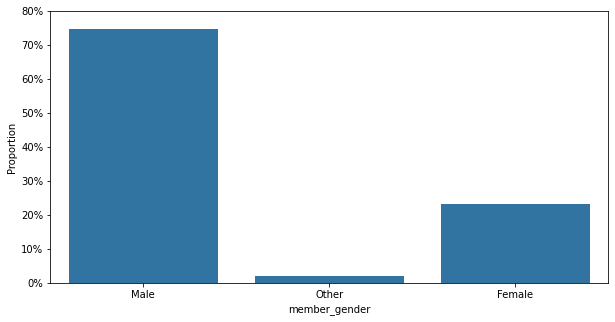

In [23]:
# Compute proportion
gender_sum = df['member_gender'].value_counts().sum()
gender_counts = df['member_gender'].value_counts()
max_gend_count = gender_counts[0]
max_prop = max_gend_count/gender_sum
# establish tick locations and create plot
fig, ax = plt.subplots(figsize = (10,5))
tick_props = np.arange(0, max_prop +0.1, 0.1)
tick_names = [f'{int(v*100)}%' for v in tick_props]
ax = sb.countplot(data = df, x = 'member_gender', color = base_color)
plt.yticks(tick_props * gender_sum, tick_names)
plt.ylabel('Proportion');

## User Age

>There is a wide range in terms of GoBike's user age. Looking at the user age distribution, we see that the majority of the users are the age of 25-40. There is a minimum age for the GoBike user, which is the legal age of 18. 
>
>The age distribution is heavily skewed to the right, indicating GoBike has more young and working users in its user base.
>
>Looking at the distribution of user type across ages, we see that younger users tends to have less subscribers. This is apparent in the age group below 25. Older users are more likely to be a subscriber.

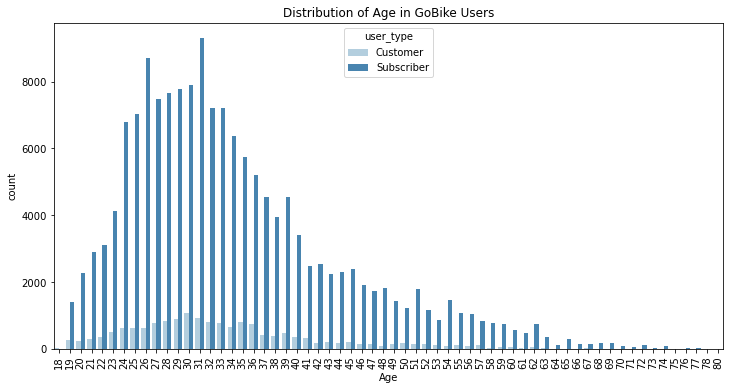

In [24]:
# count plot of member_birth_year
plt.figure(figsize=[12,6])

sb.countplot(data = df, x = 'member_age', hue = 'user_type', palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Age in GoBike Users')
plt.xlabel('Age')
plt.show()

## Time Series Plot of GoBike Users

Plotting the distribution of users and the type of users on a time series plot allows us to see the user's behaviour at different times.

Looking at the distribution of users in different days of the week, we see that the number of user that uses GoBike on the weekend is approximately 50% of that in weekday. Users tend to use GoBike more during the weekdays. This trend however, is only applicable for subscribers and not to the customers.

In a day, the usage of GoBike is the highest during the peak hours, betweem 8am - 9am and between 5pm - 6pm. 

From both the time series plot, we found that subscribers tend to use GoBike before and after working hours to commute, in the weekdays. As for customers, the number of GoBike users are fairly consistent throughout the day as well as throughout the week.



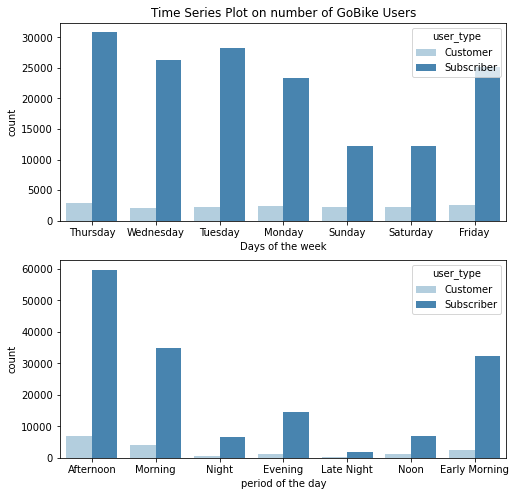

In [25]:
plt.figure(figsize = [8, 8])

# subplot 1:
ax = plt.subplot(2, 1, 1)
sb.countplot(data = df, x = 'weekday', hue = 'user_type', palette = 'Blues')

plt.xlabel('Days of the week')
plt.title('Time Series Plot on number of GoBike Users')

# subplot 2:
plt.subplot(2, 1, 2)
sb.countplot(data = df, x = 'time', hue = 'user_type', palette = 'Blues')
plt.xlabel('period of the day')

plt.show()

## Usage Duration by User Type for Selected User Age

>A point plot is used to illustrate the differences between user behaviour of customer and subscriber in terms of usage duration across the age of 20-50.
>
>For this particular age group, customers tend to use GoBike for longer durations, as compared to subscribers, which are mostly focused in shorter duration. The lower spread in terms of duration of use in the subscriber behaviour indicates that subscribers are looking for a consistent experience (eg. daily commute). This is contransting as compared to a customer which uses GoBike for exploration purposes, and hence a larger spread on the point plot.
>
>Looking at the point plot, user age does not seemed to have an impact on the duration of use. Duration of use probably depends more on the end destination of the user instead.



In [26]:
# select dataset for member aged between 20 to 50
df_flag = ((df['member_age'] >= 20) & (df['member_age'] <= 50))
df_plot = df.loc[df_flag,:]

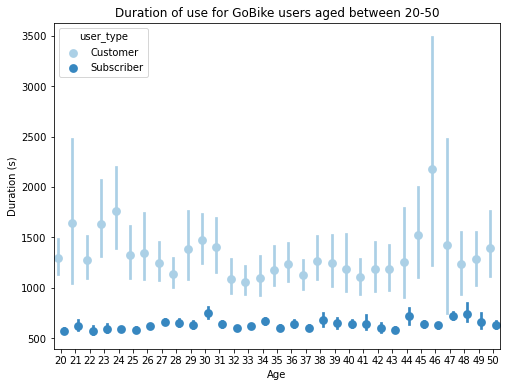

In [27]:
# setting the figure size
fig = plt.figure(figsize = [8,6])
# point plot of age against duration with user_type
ax = sb.pointplot(data = df_plot, x = 'member_age', y = 'duration_sec', hue = 'user_type',
                  palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration of use for GoBike users aged between 20-50')
plt.ylabel('Duration (s)')
plt.xlabel('Age')
ax.set_yticklabels([],minor = True)
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_Ford_GoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_Ford_GoBike.ipynb to slides
[NbConvertApp] Writing 680400 bytes to Part_II_slide_Ford_GoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_Ford_GoBike.slides.html
Use Control-C to stop this server
